# Weekly demand graph

In [287]:
# Python graphs: https://python-graph-gallery.com/
# Visualization with matplotlib: https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.htmlimport matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from pprint import pprint
from scipy.ndimage.filters import gaussian_filter1d
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText
%matplotlib inline
import os
from scipy import signal
import numpy as np
sns.set()
from scipy.signal import find_peaks

def plot_vehicle_status_graph(instances_folder,
                              result_folder,
                              name_fig,
                              df = None,
                              replace = True,
                              smooth=None,
                              print_details = True,
                              fontsize = 'small',
                              fontsize_label = 'small',
                              show_tick_label_x = False,
                              label_y = (None, None, 'small'),
                              horizontal_legend = False,
                              fig_type = 'pdf',
                              custom_tw = (None, None),
                              day_sep_config = (None, None),
                              size_inches = (18,3),
                              nbins_y = 5,
                              x_data_format = ('1h', '%H'),
                              color_bg = "#FFE4E1",
                              print_details_axis = (None, None),
                              input_dic = None,
                              show_week_days = False,
                              show_day_separator = True,
                              linewidth = 1.5,
                              tw = 30,
                              context_font_scale = 1,
                              th = 604800,
                              tick_length = 3,
                              style_plot = {'alpha':0.4, 'linewidth':0, 'colors' : [sns.xkcd_rgb['pale red'], sns.xkcd_rgb['medium green'], sns.xkcd_rgb['denim blue']]},
                              show_service_rate = "Service rate: ",
                              msg = None):
    
    
    # Create directory
    if not os.path.exists(result_folder):
        os.makedirs(result_folder)

    # Standard data frequency
    # E.g., freq = {10min, 6h, 1d}, format = {'%H:%M', '%H'}
    x_freq, x_format = x_data_format
    
    # Get custom time window (.e.g., ('2011-02-01T00:00:00', '2011-02-06T00:00:00'))
    custom_tw_min, custom_tw_max = custom_tw
    
    
    # X series (dates)
    if not custom_tw_min:
        x_min = datetime.strptime('2011-02-01T00:00:00','%Y-%m-%dT%H:%M:%S')
    else:
        x_min = datetime.strptime(custom_tw_min,'%Y-%m-%dT%H:%M:%S')
    
    if not custom_tw_max:
        x_max = datetime.strptime(str(dic_th[th][1])[:-10],'%Y-%m-%dT%H:%M:%S')
    else:
        x_max = datetime.strptime(custom_tw_max, '%Y-%m-%dT%H:%M:%S')
        
    x_start = x_min + timedelta(seconds = tw)
    x_end = x_max + timedelta(seconds = tw)
    
    x_last_req = x_min + timedelta(seconds = th) + timedelta(seconds = tw)
    
    rangeDates = pd.date_range(start=x_start,
                               end=x_end,
                               freq=x_freq)
    
    rangeDatesLabel = [str(int(d.strftime(x_format))) for d in rangeDates]
    
    
    print("TW:", x_min, x_max)
    

    x = list(sum_30.index.values)
    y1 = 1.5*np.array(list(sum_30['A'].values))
    y2 = 1.5*np.array(list(sum_30['B'].values))
    y3 = 1.5*np.array(list(sum_30['C'].values))
    #y = np.array(sum_30['A'].values) + np.array(sum_30['C'].values) + np.array(sum_30['B'].values)
    
    sum_t = np.array(y1)+ np.array(y2) + np.array(y3)
    print("MAX", max(sum_t))
    
#     all_data = list(zip(sum_t, y1, y3, y2, x))
#     sorted(all_data, key = lambda x: all_data[0], reverse = True)
    
    
#     s = len(x)
#     aa = list()
#     x2 = list()
#     y12  = list()
#     y22  = list()
#     y32  = list()
#     for i in range(1, s, 60):
#         x2.append(x[i])
#         y12.append(y1[i])
#         y22.append(y2[i])
#         y32.append(y3[i])
#     x = x2
#     y1 = y12
#     y2 = y22
#     y3 = y32
    
    
#     for count, el in enumerate(all_data):
#         tot, yy1, yy3, yy2, xx = el
#         if count > 1000:
#             break
#         x.append(xx)
#         y1.append(yy1)
#         y2.append(yy2)
#         y3.append(yy3)
    
    
    

    # Smoth lines in y
    if smooth:
        #filter = signal.firwin(smooth, [0.01, 0.06], pass_zero=False)
        #y = signal.convolve(y, filter, mode='same')
#         y1 = signal.convolve(y1, filter, mode='same')
#         y2 = signal.convolve(y2, filter, mode='same')
#         y3 = signal.convolve(y3, filter, mode='same')
        y1 = gaussian_filter1d(y1, sigma=smooth)
        y2 = gaussian_filter1d(y2, sigma=smooth)
        y3 = gaussian_filter1d(y3, sigma=smooth)

    
    
    # Define limits of y (before smoothing)
    ymin = 0
    ymax = max(y1)
    
    YlGnBu_r = ['#081d58', '#e31a1c', '#225ea8', '#1d91c0', '#7fcdbb', '#c7e9b4', '#ffffd9']

    sns.set_palette(YlGnBu_r)
    #sns.set_style("ticks", {"xtick.major.size": 8, "axes.grid":True, 'axes.facecolor':'#d0d0dd','grid.color': '1.0'})
    sns.set_style("ticks", {"xtick.major.size": 8, "axes.grid":True, 'axes.facecolor':'1.0','grid.color': '0.9'})
    sns.set_context("notebook", font_scale=context_font_scale)
    print("Range: ", rangeDates)
    plt.xlim(min(x), rangeDates[-1])
    
    
    # Plot
    plt.stackplot(x, y1, y3, y2, **style_plot)
    
    
    
    
    #plt.stackplot(x, y, labels=graph_legend, linewidth=0.01, edgecolor='white')
    #plt.stackplot(x, y, labels=graph_legend, linewidth=0.00)#, edgecolor='white')
    
    # Define and format
    # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
    # {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
    ticks_x = []
    if show_tick_label_x:
        ticks_x = rangeDatesLabel
        
    l_y, t_y, fontsize = label_y

    if l_y is not None:
        plt.yticks(l_y,t_y,fontsize=fontsize)
        plt.ylim(l_y[0], l_y[-1])
        print("LIMITS:", l_y[0], l_y[-1])
    else:
        plt.yticks(fontsize=fontsize)
        plt.locator_params(axis='y', nbins = nbins_y)
        
        
    plt.xticks(rangeDates, ticks_x, fontsize=fontsize)
    
    # https://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis.set_tick_params
    ax = plt.gca()
    
    
    t_width = linewidth
    ax.tick_params(width = t_width, length= tick_length)
    ax.spines['top'].set_linewidth(t_width)
    ax.spines['right'].set_linewidth(t_width)
    ax.spines['bottom'].set_linewidth(t_width)
    ax.spines['left'].set_linewidth(t_width)
    
    # Print x, y axis labels
    det_x, det_y = print_details_axis
    if det_x:
        plt.xlabel(det_x, fontweight='bold', fontsize=fontsize_label)
    if det_y:
        plt.ylabel(det_y, fontweight='bold', fontsize=fontsize_label)
    
    if print_details:
    
        # Position legend (Source: https://matplotlib.org/api/legend_api.html?highlight=legend#module-matplotlib.legend)
        legend = None
        # https://pythonspot.com/matplotlib-legend/
        if horizontal_legend:
            legend = plt.legend(loc = "upper center",
                   bbox_to_anchor=(0.5, -0.1),
                   ncol=len(graph_legend),
                   fontsize=fontsize,
                   edgecolor="white",
                   title="Vehicle status:")
        else:
            legend = plt.legend(loc = "upper left",
                   bbox_to_anchor=(1, 1),
                   ncol=1,
                   fontsize=fontsize,
                   edgecolor="white",
                   title="Vehicle status:")
        
        legend.get_title().set_fontsize(fontsize_label) #legend 'Title' fontsize
    
    # Line defining TW
    #plt.axvline(x = x_last_req, linewidth=1, color='r', linestyle='--')    
    
    
    if show_week_days:
        # First date week
        week_day = x_min + timedelta(hours = 10)

        # Loop days of the week
        diff_days = x_end - x_start
        print("DAYS:", diff_days)
        print(diff_days.total_seconds(), diff_days.total_seconds()/(24*3600))

        for i in range(0,7):
            
            # Print week day
            plt.text(week_day,
                 l_y[-1]+5,
                 week_day.strftime("%a"),
                 fontsize=fontsize_label,
                 bbox=dict(boxstyle='square,pad=0.0',
                           fc='none',
                           ec='none'))

            week_day = week_day + timedelta(hours = 24)

            
    ########################################################################
    # Inserting data labels ################################################

    # x position
    extra_info_coord = '2011-02-06 00:00:00'
    x_label = datetime.strptime(extra_info_coord, '%Y-%m-%d %H:%M:%S')
    val = [(sq_class, sum_30.loc[extra_info_coord][sq_class]) for sq_class in ['A', 'C', 'B']]
    
    y_pos_labels = []
    previous = 0
    total = 0
    for sq_class, v in val:
        y_pos_labels.append((previous, v//2 + previous, previous + v, v, sq_class))
        previous = previous + v
    
    y_pos_labels.append((previous, v//2 + previous, previous + v, total, 'total'))
    
    bar = []
    bottom = 0
    width_bar = 0.02
    
    print("Data per status:")
    pprint(y_pos_labels)
    left = True
    color_line = 'blueviolet'
    for l, m, r, label, status in y_pos_labels:
        #bar.append(label)
        
       
        #ax.annotate(label, xy=(extra_info_coord, m-10), facecolor='red', alpha=0.5, edgecolor='red', textcoords='data', zorder= 1001)
#         t = plt.text(x_label + timedelta(minutes=60), m, label, bbox=dict(boxstyle='square,pad=0.1',
#                            alpha=0.8,
#                            fc='white',
#                            ec='none'),
#                     zorder= 1001)
        if left == True:
            x_pos_tag = x_label + timedelta(minutes=60)
            side = ((x_label + timedelta(minutes=120), m))
#             left = not left
#         else:
#             x_pos_tag = x_label - timedelta(minutes=60)
#             side = ((x_label - timedelta(minutes=120) - timedelta(minutes=240), m))
#             left = not left
        

        #print(left, side)
        print(side, (x_label, m+30))
        ax.annotate("{} {}".format(label, status), xy=(x_label, m+30),
                    xytext=side,
                    bbox=dict(
                        boxstyle='square,pad=0.1',
                        alpha=0.8,
                        fc='white',
                        ec='none'),
                    textcoords='data',
                    zorder= 1001)#,
                    #arrowprops=dict(arrowstyle='-', color='violet', linewidth=1))
        #arrowprops=dict(arrowstyle='->'), xytext=(15, -10)
        #t.set_bbox(dict(facecolor='red', alpha=0.5, edgecolor='red'))
        #plt.plot([x_label, x_label], [l,r], '-', linewidth=6, markersize=6, marker = "s", zorder= 2000)
        plt.plot([x_label, x_label], [l,r], linewidth=1, zorder=2000, markersize=6, marker = "_", color=color_line)
        
        #plt.bar([x_label], (label,), width_bar, bottom = (bottom,), linewidth=0, zorder= 1000)
        #bottom += label
    bar = []
    bottom = 0
    width_bar = 0.02

        
        
    #plt.axvline(x= x_label, linewidth=7, color='black', alpha=0.6)

    if show_day_separator:
        # Print day separator
        back_day_sep_dic, front_day_sep_dic = day_sep_config

        # Day of the week line separator
        dashed_line = x_min

        for i in range(0,6):

            # Print day separator
            dashed_line = dashed_line + timedelta(hours = 24)
            
            #if dashed_line != x_label: 
            
            if back_day_sep_dic:
                back_day_sep_dic["x"] = dashed_line
                # White box below dashed line for constrast
                plt.axvline(**back_day_sep_dic)

            if front_day_sep_dic:
                front_day_sep_dic["x"] = dashed_line
                # Dashed line to separate week days
                plt.axvline(**front_day_sep_dic)
    
    # Remove white margins
    plt.margins(0,0)
    
    
    
    # PRINT SERVICE RATE
    # String format - https://docs.python.org/2/library/string.html#formatstrings
    # font - https://matplotlib.org/gallery/text_labels_and_annotations/fonts_demo_kw.html
    # size - {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}        

    if msg:
        msg_text, msg_fontsize = msg
        at = AnchoredText(msg_text,
                 prop=dict(fontstyle='italic',
                 fontsize=msg_fontsize,
                 transform=ax.transAxes,
                 bbox=dict(boxstyle='square,pad=0.0',
                           alpha=0.5,
                           fc='none',
                           ec='none')), frameon=True, loc='upper left', pad=0.0, borderpad=0.5)
        
        at.patch.set_boxstyle("square,pad=0.0")
        at.patch.set_ec('none')
        at.patch.set_fc('none')
        ax.add_artist(at)

    
    # Remove white margins
    plt.margins(0,0)
    
    fig = plt.gcf()
    fig.set_size_inches(size_inches[0], size_inches[1])
    
    #plt.savefig("{}{}".format(result_folder, name_fig), bbox_inches="tight", pad_inches=0)

    file_path = "{}{}".format(result_folder, name_fig)
    print(file_path)
    plt.savefig(file_path, bbox_inches="tight")#, dpi=600)
                            

In [241]:
import pandas as pd
instances_folder = 'C:/Users/LocalAdmin/IdeaProjects/slevels/instance_output/week/'
request_data = 'IN-WEEKDENY_BA-30_ST-604800_MR-1000_IF-1000_MC-4_CS-BB_RE_CT_RT_UR'
input_class = '{}request_track/{}.csv'.format(instances_folder, request_data)
df_demand_class = pd.read_csv(input_class, index_col='earliest', usecols=['earliest', 'class'], parse_dates = True, comment = "#" )
print("Total number of requests:", len(df_demand_class))

Total number of requests: 1585072


In [242]:
# Transforming data rows into columns A, B, and C
df = df_demand_class.sort_values(by='earliest')
df['A'] = (df['class'] == 'A')
df['B'] = (df['class'] == 'B')
df['C'] = (df['class'] == 'C')

In [243]:
# Removing class columns
df = df[['A', 'B', 'C']]

print("Total:", len(df))

Total: 1585072


In [268]:
# Resample to get batches of 30 seconds
sum_30 = df.resample('30s').sum().astype(int)
sum_30.tail()

,A,B,C
earliest,,,
2011-02-07 23:57:30,4,21,6
2011-02-07 23:58:00,10,37,8
2011-02-07 23:58:30,3,14,3
2011-02-07 23:59:00,8,32,8
2011-02-07 23:59:30,4,15,3


TW: 2011-02-01 00:00:00 2011-02-08 00:00:00
MAX 364.5
Range:  DatetimeIndex(['2011-02-01 00:00:30', '2011-02-01 03:00:30',
               '2011-02-01 06:00:30', '2011-02-01 09:00:30',
               '2011-02-01 12:00:30', '2011-02-01 15:00:30',
               '2011-02-01 18:00:30', '2011-02-01 21:00:30',
               '2011-02-02 00:00:30', '2011-02-02 03:00:30',
               '2011-02-02 06:00:30', '2011-02-02 09:00:30',
               '2011-02-02 12:00:30', '2011-02-02 15:00:30',
               '2011-02-02 18:00:30', '2011-02-02 21:00:30',
               '2011-02-03 00:00:30', '2011-02-03 03:00:30',
               '2011-02-03 06:00:30', '2011-02-03 09:00:30',
               '2011-02-03 12:00:30', '2011-02-03 15:00:30',
               '2011-02-03 18:00:30', '2011-02-03 21:00:30',
               '2011-02-04 00:00:30', '2011-02-04 03:00:30',
               '2011-02-04 06:00:30', '2011-02-04 09:00:30',
               '2011-02-04 12:00:30', '2011-02-04 15:00:30',
               '2011-02

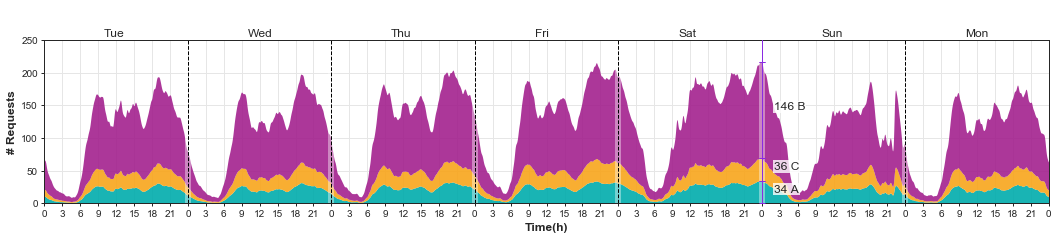

In [288]:
general_config = dict(replace=True,
                    smooth=15,
                    df = sum_30,
                    label_y = ([0, 50, 100, 150, 200, 250],[0, 50, 100, 150, 200, 250] , "small"),
                    print_details=False,
                    size_inches = (18,3),
                    fontsize="medium",
                    fontsize_label="medium",
                    custom_tw = ('2011-02-01T00:00:00', '2011-02-08T00:00:00'),
                    x_data_format = ('3h', '%H'),
                    color_bg = "#C0C0C0",
                    horizontal_legend = True,
                    day_sep_config = (dict(linewidth=6, color='white', alpha=0.4), dict(linewidth=1, color='black', linestyle='--')),
                    style_plot = {'alpha':0.9, 'linewidth':0, 'colors' : ['#00acac', '#f8a51b', '#a3218e']},
                    fig_type = 'eps',  
                    linewidth = 1)


file_name = 'DEMAND_{}.svg'.format(request_data)
result_folder = '{}demand_track/'.format(instances_folder)
plot_vehicle_status_graph(input_class,
                            result_folder,
                            file_name,
                            show_tick_label_x = True,
                            show_week_days = True,
                            show_day_separator = True,
                            show_service_rate = True,
                            print_details_axis = ("Time(h)", "# Requests"),
                            **general_config)

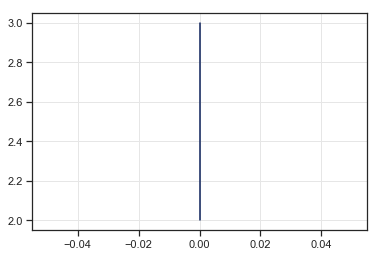

In [47]:
plt.plot([0,0], [2,3])

## Presentation

TW: 2011-02-01 00:00:00 2011-02-08 00:00:00
Range:  DatetimeIndex(['2011-02-01 00:00:30', '2011-02-01 06:00:30',
               '2011-02-01 12:00:30', '2011-02-01 18:00:30',
               '2011-02-02 00:00:30', '2011-02-02 06:00:30',
               '2011-02-02 12:00:30', '2011-02-02 18:00:30',
               '2011-02-03 00:00:30', '2011-02-03 06:00:30',
               '2011-02-03 12:00:30', '2011-02-03 18:00:30',
               '2011-02-04 00:00:30', '2011-02-04 06:00:30',
               '2011-02-04 12:00:30', '2011-02-04 18:00:30',
               '2011-02-05 00:00:30', '2011-02-05 06:00:30',
               '2011-02-05 12:00:30', '2011-02-05 18:00:30',
               '2011-02-06 00:00:30', '2011-02-06 06:00:30',
               '2011-02-06 12:00:30', '2011-02-06 18:00:30',
               '2011-02-07 00:00:30', '2011-02-07 06:00:30',
               '2011-02-07 12:00:30', '2011-02-07 18:00:30',
               '2011-02-08 00:00:30'],
              dtype='datetime64[ns]', freq='6H')
LIMITS

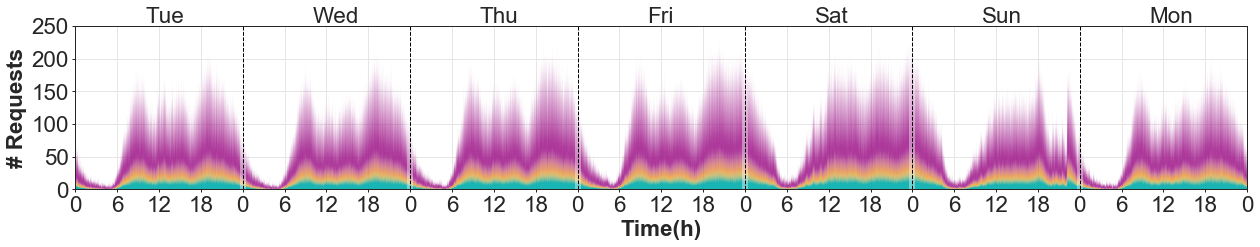

In [11]:
general_config = dict(replace=True,
                    smooth=0.2,
                    df = sum_30,
                    label_y = ([0, 50, 100, 150, 200, 250],[0, 50, 100, 150, 200, 250] , "x-large"),
                    print_details=False,
                      context_font_scale = 1.3,
                    size_inches = (21,3),
                    fontsize="x-large",
                    fontsize_label="x-large",
                    custom_tw = ('2011-02-01T00:00:00', '2011-02-08T00:00:00'),
                    x_data_format = ('6h', '%H'),
                    color_bg = "#C0C0C0",
                    horizontal_legend = True,
                    day_sep_config = (dict(linewidth=6, color='white', alpha=0.4), dict(linewidth=1, color='black', linestyle='--')),
                    style_plot = {'alpha':0.9, 'linewidth':0, 'colors' : ['#00acac', '#f8a51b', '#a3218e']},
                    fig_type = 'pdf',  
                    linewidth = 1)


file_name = 'demand_presentation_{}.png'.format(request_data)
result_folder = '{}demand_track/'.format(instances_folder)
plot_vehicle_status_graph(input_class,
                            result_folder,
                            file_name,
                            show_tick_label_x = True,
                            show_week_days = True,
                            show_day_separator = True,
                            show_service_rate = True,
                            print_details_axis = ("Time(h)", "# Requests"),
                            **general_config)

